In [616]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from itertools import combinations
from sklearn import preprocessing as pp
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [617]:
#read files
#Reading train file:
train = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Titanic-Datasets/master/titanic_train.csv')
#Reading test file:
test = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Titanic-Datasets/master/titanic_test.csv')

In [618]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [619]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [620]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [621]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [622]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [623]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [624]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(4)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000


In [625]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(4)

,Total,Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
Embarked,0,0.000000


In [626]:
# fill up missing values with mode
train['Cabin'] = train['Cabin'].fillna(train['Cabin'].mode()[0])
test['Cabin'] = test['Cabin'].fillna(test['Cabin'].mode()[0])

train['Fare'] = train['Fare'].fillna(train['Fare'].mode()[0])
test['Fare'] = test['Fare'].fillna(test['Fare'].mode()[0])

train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

#fill missing values with median
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

In [627]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [628]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [629]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,B57 B59 B63 B66,S


In [630]:
pclass=train.groupby('Pclass')['Survived'].sum().reset_index()
pclass

,Pclass,Survived
0,1,136
1,2,87
2,3,119


In [631]:
sex=train.groupby('Sex')['Survived'].sum().reset_index()
sex

,Sex,Survived
0,female,233
1,male,109


In [632]:
sex1={'female':1, 'male':0}
train.Sex=train.Sex.map(sex1)
test.Sex=test.Sex.map(sex1)

In [633]:
age=train.groupby('Age')['Survived'].sum().reset_index()
age

,Age,Survived
0,0.42,1
1,0.67,1
2,0.75,2
3,0.83,2
4,0.92,1
...,...,...
83,70.00,0
84,70.50,0
85,71.00,0
86,74.00,0


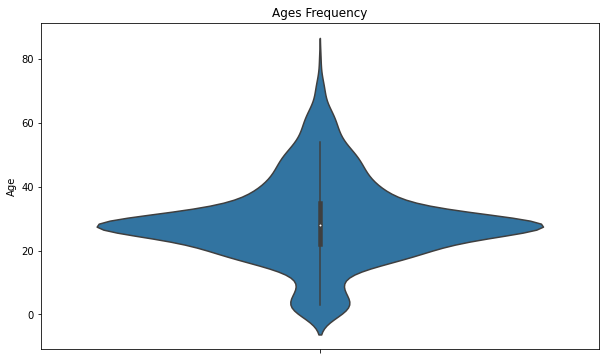

In [634]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Age"])
plt.show()

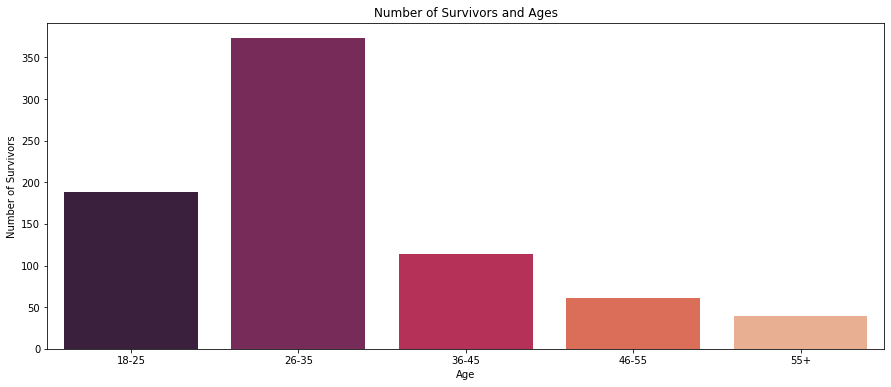

In [635]:
age18_25 = train.Age[(train.Age <= 25) & (train.Age >= 18)]
age26_35 = train.Age[(train.Age <= 35) & (train.Age >= 26)]
age36_45 = train.Age[(train.Age <= 45) & (train.Age >= 36)]
age46_55 = train.Age[(train.Age <= 55) & (train.Age >= 46)]
age55above = train.Age[train.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Survivors and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Survivors")
plt.show()

In [636]:
bins = [0., 18., 35., 64., 65.+ np.inf]
names = ['child','young adult', 'middle aged', 'pensioner']

train['Age_Range'] = pd.cut(train['Age'], bins, labels=names)
test['Age_Range'] = pd.cut(test['Age'], bins, labels=names)

In [637]:
age_range=train.groupby('Age_Range')['Survived'].sum().reset_index()
age_range

,Age_Range,Survived
0,child,70
1,young adult,189
2,middle aged,82
3,pensioner,1


In [638]:
age_range1={'child':1,'young adult':2, 'middle aged':3, 'pensioner': 4}
train.Age_Range=train.Age_Range.map(age_range1)
test.Age_Range=test.Age_Range.map(age_range1)

In [639]:
train.Age_Range.isnull().sum(), test.Age_Range.isnull().sum()

(0, 0)

In [640]:
age_range=train.groupby('Age_Range')['Survived'].sum().reset_index()
age_range

,Age_Range,Survived
0,1,70
1,2,189
2,3,82
3,4,1


In [641]:
family=train.groupby('SibSp')['Survived'].sum().reset_index()
family

,SibSp,Survived
0,0,210
1,1,112
2,2,13
3,3,4
4,4,3
5,5,0
6,8,0


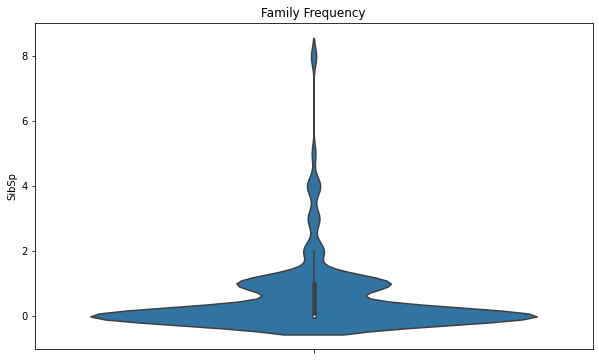

In [642]:
plt.figure(figsize=(10,6))
plt.title("Family Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["SibSp"])
plt.show()

In [643]:
bins1 = [-1., 3., 6., 8.+ np.inf]
names1 = ['small family', 'medium family', 'large family']

train['Family_Range'] = pd.cut(train['SibSp'], bins1, labels=names1)
test['Family_Range'] = pd.cut(test['SibSp'], bins1, labels=names1)

In [644]:
family_range=train.groupby('Family_Range')['Survived'].sum().reset_index()
family_range

,Family_Range,Survived
0,small family,339
1,medium family,3
2,large family,0


In [645]:
family_range1={'small family':1, 'medium family': 2, 'large family':3}
train.Family_Range=train.Family_Range.map(family_range1)
test.Family_Range=test.Family_Range.map(family_range1)

In [646]:
train['Family_Range'].isnull().sum().sum(), test['Family_Range'].isnull().sum().sum()

(0, 0)

In [647]:
parch=train.groupby('Parch')['Survived'].sum().reset_index()
parch

,Parch,Survived
0,0,233
1,1,65
2,2,40
3,3,3
4,4,0
5,5,1
6,6,0


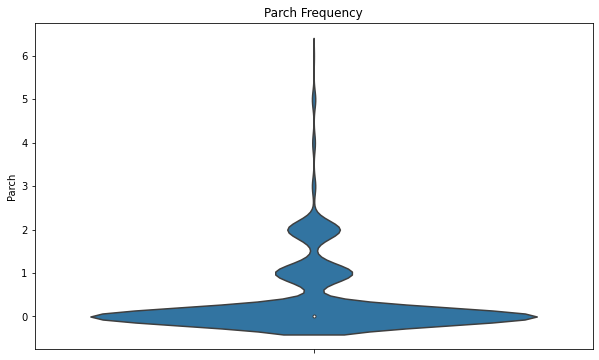

In [648]:
plt.figure(figsize=(10,6))
plt.title("Parch Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Parch"])
plt.show()

In [649]:
fare=train.groupby('Fare')['Survived'].sum().reset_index()
fare

,Fare,Survived
0,0.0000,1
1,4.0125,0
2,5.0000,0
3,6.2375,0
4,6.4375,0
...,...,...
243,227.5250,3
244,247.5208,1
245,262.3750,2
246,263.0000,2


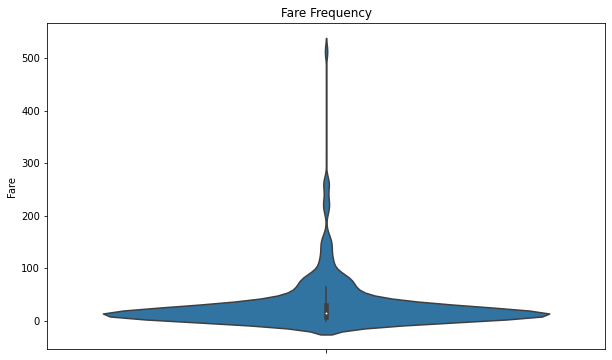

In [650]:
plt.figure(figsize=(10,6))
plt.title("Fare Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Fare"])
plt.show()

In [651]:
bins0 = [-1., 100., 200., 300., 400., 500.+ np.inf]
names0 = ['0-99', '100-199', '200-299', '300-399', '400+']

train['Fare_Range'] = pd.cut(train['Fare'], bins0, labels=names0)
test['Fare_Range'] = pd.cut(test['Fare'], bins0, labels=names0)

In [652]:
fare_range=train.groupby('Fare_Range')['Survived'].sum().reset_index()
fare_range

,Fare_Range,Survived
0,0-99,303
1,100-199,25
2,200-299,11
3,300-399,0
4,400+,3


In [653]:
fare_range1={'0-99':1, '100-199':2, '200-299': 3, '300-399':4, '400+':5}
train.Fare_Range=train.Fare_Range.map(fare_range1)
test.Fare_Range=test.Fare_Range.map(fare_range1)

In [654]:
train.Fare_Range.isnull().sum(), test.Fare_Range.isnull().sum()

(0, 0)

In [655]:
embark=train.groupby('Embarked')['Survived'].sum().reset_index()
embark

,Embarked,Survived
0,C,93
1,Q,30
2,S,219


In [656]:
embark1={'C':0, 'Q':1, 'S': 2}
train.Embarked=train.Embarked.map(embark1)
test.Embarked=test.Embarked.map(embark1)

In [657]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(3)

,Total,Percent
Fare_Range,0,0.0
Family_Range,0,0.0
Age_Range,0,0.0


In [658]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(3)

,Total,Percent
Fare_Range,0,0.0
Family_Range,0,0.0
Age_Range,0,0.0


In [659]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [660]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range,Family_Range,Fare_Range
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,B96 B98,2,2,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0,3,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2,2,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2,2,1,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,B96 B98,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,B96 B98,2,2,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,2,2,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,B96 B98,2,2,1,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,0,2,1,1


In [661]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range,Family_Range,Fare_Range
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,B57 B59 B63 B66,1,2,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,B57 B59 B63 B66,2,3,1,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,B57 B59 B63 B66,1,3,1,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,B57 B59 B63 B66,2,2,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,27.0,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,2,2,1,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,0,3,1,2
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,2,3,1,1
416,1308,3,"Ware, Mr. Frederick",0,27.0,0,0,359309,8.0500,B57 B59 B63 B66,2,2,1,1


In [662]:
train.dtypes

PassengerId        int64
Survived           int64
Pclass             int64
Name              object
Sex                int64
Age              float64
SibSp              int64
Parch              int64
Ticket            object
Fare             float64
Cabin             object
Embarked           int64
Age_Range       category
Family_Range    category
Fare_Range      category
dtype: object

In [663]:
test.dtypes

PassengerId        int64
Pclass             int64
Name              object
Sex                int64
Age              float64
SibSp              int64
Parch              int64
Ticket            object
Fare             float64
Cabin             object
Embarked           int64
Age_Range       category
Family_Range    category
Fare_Range      category
dtype: object

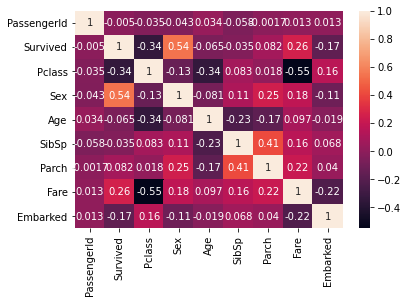

In [664]:
#create a heatmap to correlate promotion
plt.figure(figsize=(6,4))
cmap=train.corr()
sns.heatmap(cmap, annot=True)

In [665]:
y = train["Survived"]
features = ["Pclass", "Sex","Parch", "Fare", "Embarked", "Age_Range", "Family_Range", "Fare_Range"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

In [666]:
X

,Pclass,Sex,Parch,Fare,Embarked,Age_Range_1,Age_Range_2,Age_Range_3,Age_Range_4,Family_Range_1,Family_Range_2,Family_Range_3,Fare_Range_1,Fare_Range_2,Fare_Range_3,Fare_Range_4,Fare_Range_5
0,3,0,0,7.2500,2,0,1,0,0,1,0,0,1,0,0,0,0
1,1,1,0,71.2833,0,0,0,1,0,1,0,0,1,0,0,0,0
2,3,1,0,7.9250,2,0,1,0,0,1,0,0,1,0,0,0,0
3,1,1,0,53.1000,2,0,1,0,0,1,0,0,1,0,0,0,0
4,3,0,0,8.0500,2,0,1,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,13.0000,2,0,1,0,0,1,0,0,1,0,0,0,0
887,1,1,0,30.0000,2,0,1,0,0,1,0,0,1,0,0,0,0
888,3,1,2,23.4500,2,0,1,0,0,1,0,0,1,0,0,0,0
889,1,0,0,30.0000,0,0,1,0,0,1,0,0,1,0,0,0,0


In [667]:
X_test

,Pclass,Sex,Parch,Fare,Embarked,Age_Range_1,Age_Range_2,Age_Range_3,Age_Range_4,Family_Range_1,Family_Range_2,Family_Range_3,Fare_Range_1,Fare_Range_2,Fare_Range_3,Fare_Range_4,Fare_Range_5
0,3,0,0,7.8292,1,0,1,0,0,1,0,0,1,0,0,0,0
1,3,1,0,7.0000,2,0,0,1,0,1,0,0,1,0,0,0,0
2,2,0,0,9.6875,1,0,0,1,0,1,0,0,1,0,0,0,0
3,3,0,0,8.6625,2,0,1,0,0,1,0,0,1,0,0,0,0
4,3,1,1,12.2875,2,0,1,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,8.0500,2,0,1,0,0,1,0,0,1,0,0,0,0
414,1,1,0,108.9000,0,0,0,1,0,1,0,0,0,1,0,0,0
415,3,0,0,7.2500,2,0,0,1,0,1,0,0,1,0,0,0,0
416,3,0,0,8.0500,2,0,1,0,0,1,0,0,1,0,0,0,0


In [668]:
#split train set for testing
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)
#bring all features to the same range
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_validation=sc_X.transform(X_validation)

In [669]:
model= XGBClassifier()
name='XGB'

In [670]:
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

XGB: 0.820188 (0.030248)


In [671]:
# Make predictions on validation dataset
model = XGBClassifier(learning_rate=0.1, n_estimators=400, max_depth=10, min_child_weight=10, 
                      gamma=0.4,nthread=4, subsample=0.8, colsample_bytree=0.8, 
                      objective= 'binary:logistic',scale_pos_weight=3,seed=29)
model.fit(X, y)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, model.predict(X))
print(auc(false_positive_rate, true_positive_rate))

0.8885773176109674


In [672]:
print(roc_auc_score(y, model.predict(X)))

0.8885773176109674


In [673]:
predictions = model.predict(X_test)

In [674]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [675]:
#upload submission
my_submission = pd.read_csv("my_submission.csv")
my_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
